# 4.10 Coding Etiquette & Excel Reporting

### This script contains the following points:
#### 1. Exercise Q1a. Import libraries and final data set from Exercise 4.9
#### 2. Exercise Q1b. Check the dimensions of the imported dataframe
#### 3. Exercise Q2. Address any Personally Identifiable Information (PII) data
#### 4. Exercise Q3a. US region column
#### 5. Exercise Q3b. Spending habits between U.S. regions
#### 6. Exercise Q4. Exclusion flag for low-activity customers
#### 7. Exercise Q5. Customer profiles
#### 8. Exercise Q5b. Sampling to avoid memory issues
#### 9. Exercise Q5c. Bar chart: hour of the day / day of the week impact on profiles (sample)
#### 10. Exercise Q6. Histogram: profile distribution
#### 11. Exercise Q7. Aggregate the max, mean, and min on a customer-profile (frequency & expenditure)
#### 12. Exercise Q8. Compare customer profiles with regions and departments
#### 13. Exercise Q9. Export visualizations in relevant project folder

#### 1. Exercise Q1a. Import libraries and final data set from Exercise 4.9

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Path to main project folder

path = r'C:\Users\Mark\_Instacart Basket Analysis'

In [3]:
# Retrieve the orders_products_customers_merged.pkl file from Exercise 4.9
# Assign it to df_poc (dataframe products, orders, customers)

df_poc = pd.read_pickle(os.path.join(path, '03 Scripts', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
# Retrieve the customers_clean.pkl file

df_customers = pd.read_pickle(os.path.join(path, '03 Scripts', 'Prepared Data', 'customers_clean.pkl'))

#### 2. Exercise Q1b. Check the dimensions of the imported dataframe

In [5]:
# Ensure nothing looks out of place with the imported dataframe

df_poc.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
# Ensure nothing looks out of place with the imported dataframe

df_poc.tail()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income
30328758,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755
30328759,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755
30328760,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
30328761,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Regular customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
30328762,2922475,66343,4,1,12,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151


In [7]:
# See if the data set is large, small, wide, or long

df_poc.shape

(30328763, 32)

In [8]:
# Review the columns

df_poc.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'price_range', 'busiest day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_prices',
       'spend_flag', 'mean_days_since_prior', 'frequency_flag', 'first_name',
       'last_name', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'family_status', 'income'],
      dtype='object')

In [9]:
# Review the dataframe info: index dtype and columns, non-null values and memory usage

df_poc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30328763 entries, 0 to 30328762
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_the_week  int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  match                   category
 14  price_range             object  
 15  busiest day             object  
 16  busiest_period_of_day   object  
 17  max_order               int64   
 18  loyalty_flag            object  
 19  mean_prices             float64 
 20  spend_flag              object  
 21  mean_d

#### 3. Exercise Q2. Address any Personally Identifiable Information (PII) data

In [10]:
# Sensitive PII data: names, email addresses, physical addresses, and phone numbers
# This dataframe only has "first_name" and "last_name" as PII data
# Drop PII columns

df_poc.drop(columns=['first_name', 'last_name'], inplace = True)

In [11]:
# Review df_poc columns

df_poc.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'price_range', 'busiest day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_prices',
       'spend_flag', 'mean_days_since_prior', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'number_of_dependants', 'family_status',
       'income'],
      dtype='object')

#### 4. Exercise Q3a. US region column

In [12]:
# Review the customer dataframe columns

df_customers.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependants', 'family_status', 'income'],
      dtype='object')

In [13]:
# Retrieve a list of unique states

states_customers = df_customers['state'].unique()

In [14]:
# Create a regional segmentation of the data
# Create a "region" list based on the "state" column

# Regional lists of states

states_northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
states_midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
states_south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
states_west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']
      
# Empty list to hold each state and its corresponding region

region = []

# Append matching state/region to the region list
# If a state in the "states_customers" dataframe is found in any of the regional lists of states, 
# (states_northeast, states_midwest, states_south, states_west) append it with the applicable region

for usa_state in states_customers: 
    if usa_state in states_northeast: region.append([usa_state, 'Northeast'])
    elif usa_state in states_midwest: region.append([usa_state, 'Midwest'])
    elif usa_state in states_south: region.append([usa_state, 'South'])
    elif usa_state in states_west: region.append([usa_state, 'West'])


In [15]:
# Turn the region list into a dataframe

df_state_region = pd.DataFrame(region, columns=['state', 'region']).sort_values(['region'], ascending = True)

In [16]:
df_state_region

,state,region
0,Missouri,Midwest
48,Illinois,Midwest
47,Minnesota,Midwest
3,Iowa,Midwest
46,South Dakota,Midwest
45,Kansas,Midwest
23,Indiana,Midwest
43,Michigan,Midwest
11,Nebraska,Midwest
28,Ohio,Midwest


In [17]:
# Final review of the "df_poc" dataframe before merging with the "df_state_region" dataframe

df_poc.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spend_flag,mean_days_since_prior,frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.259259,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Low spender,20.259259,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423


In [19]:
# Merge the df_poc dataframe with the df_state_region dataframe
# They have a different shape but share the "state" column
# The "indicator = 'final_merge' argument" checks for a full match,
# and because we had a previous merge that took the default name, this column will have a new name

df_merged_all = df_poc.merge(df_state_region, how = 'inner', on = 'state', indicator = 'final_merge')

In [20]:
# Review the frequency of the "exclude_flag" column
# Keep the "NaN" and exclude the "exclude" rows

df_merged_all['final_merge'].value_counts(dropna = False)

both          30328763
right_only           0
left_only            0
Name: final_merge, dtype: int64

#### 5. Exercise Q3b. Spending habits between U.S. regions

In [21]:
# Crosstab the region variable with the spending flag

crosstab = pd.crosstab(df_merged_all['spend_flag'], df_merged_all['region'], dropna = False)

In [22]:
# Spending habits between the different U.S. regions

crosstab

region,Midwest,Northeast,South,West
spend_flag,,,,
High spender,148321,102905,197099,149907
Low spender,6959265,5253367,9902718,7615181


#### 6. Exercise Q4. Exclusion flag for low-activity customers

In [23]:
# Exclusion flag for low-activity customers with less than 5 orders

df_merged_all.loc[df_merged_all['max_order'] < 5, 'exclude_flag'] = 'exclude'

In [24]:
# Review the frequency of the "exclude_flag" column
# Keep the "NaN" and exclude the "exclude" rows

df_merged_all['exclude_flag'].value_counts(dropna = False)

NaN        29303281
exclude     1025482
Name: exclude_flag, dtype: int64

In [25]:
# Subset the rows where "exclude_flag" value is "NaN"

df_merged_all_included = df_merged_all[df_merged_all['exclude_flag'].isnull() == True]

In [26]:
# Review the frequency of the the rows that will be included in the analysis

df_merged_all_included['exclude_flag'].value_counts(dropna = False)

NaN    29303281
Name: exclude_flag, dtype: int64

In [27]:
# Subset the rows where the "exclude_flag" value is "exclude"

df_merged_all_excluded = df_merged_all[df_merged_all['exclude_flag'].isnull() == False]

In [28]:
# Review the frequency of the the rows that will be excluded from the analysis

df_merged_all_excluded['exclude_flag'].value_counts(dropna = False)

exclude    1025482
Name: exclude_flag, dtype: int64

In [29]:
# Export excluded rows (low-activity customers < 5 orders) "df_merged_all_excluded" dataframe to pkl

df_merged_all_excluded.to_pickle(os.path.join(path, '03 Scripts','Prepared Data', 'orders_products_customers_low_activity.pkl'))

In [30]:
# Export included rows (high-activity customers >= 5 orders) "df_merged_all_included" dataframe to pkl

df_merged_all_included.to_pickle(os.path.join(path, '03 Scripts','Prepared Data', 'orders_products_customers_high_activity.pkl'))

#### 7. Exercise Q5a. Customer profiles

In [29]:
# Retrieve the orders_products_customers_high_activity.pkl file
# Assign it to a new dataframe "df_customer_profile"

df_customer_profile = pd.read_pickle(os.path.join(path, '03 Scripts', 'Prepared Data', 'orders_products_customers_high_activity.pkl'))

In [30]:
# Review the columns names

df_customer_profile.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'price_range', 'busiest day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_prices',
       'spend_flag', 'mean_days_since_prior', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'number_of_dependants', 'family_status',
       'income', 'region', 'final_merge', 'exclude_flag'],
      dtype='object')

In [31]:
# Ensure the "exclude_flag" column has only NaNs

df_customer_profile['exclude_flag'].value_counts(dropna = False)

NaN    29303281
Name: exclude_flag, dtype: int64

In [32]:
# Ensure the "final_merge" has only "both" rows

df_customer_profile['final_merge'].value_counts(dropna = False)

both          29303281
right_only           0
left_only            0
Name: final_merge, dtype: int64

In [33]:
# Drop "exclude_flag", "final_merge" variables

df_customer_profile.drop(columns=['exclude_flag', 'final_merge'], inplace = True)

In [34]:
# Profile variable based on age, income, certain goods in the "department_id" column, and number of dependants

# Profile: "single adult" - income >= 36000 - department 7, 10, 21

df_customer_profile.loc[(df_customer_profile['age'] > 17) &  
                        (df_customer_profile['age'] < 60) &
                        (df_customer_profile['income'] >= 36000) & 
                        (df_customer_profile['department_id'].isin([7, 10, 21])) & 
                        (df_customer_profile['number_of_dependants'] >= 0) &
                        (df_customer_profile['family_status'] != 'married'), 
                        'customer_profile'] = 'single adult'


In [35]:
# Profile: "married adult" - income >= 36000 - department 7, 10, 21 

df_customer_profile.loc[(df_customer_profile['age'] > 17) &  
                        (df_customer_profile['age'] < 60) &
                        (df_customer_profile['income'] >= 36000) & 
                        (df_customer_profile['department_id'].isin([7, 10, 21])) & 
                        (df_customer_profile['number_of_dependants'] >= 0) &
                        (df_customer_profile['family_status'] == 'married'), 
                        'customer_profile'] = 'married adult'


In [36]:
# Profile: "senior" - married or single - income >= 36000 - departments 7, 10, 21

df_customer_profile.loc[(df_customer_profile['age'] >= 60) &  
                        (df_customer_profile['income'] >= 36000) & 
                        (df_customer_profile['department_id'].isin([7, 10, 21])) & 
                        (df_customer_profile['number_of_dependants'] >= 0) &
                        ((df_customer_profile['family_status'] == 'married') |
                        (df_customer_profile['family_status'] != 'married')), 
                        'customer_profile'] = 'senior'

In [37]:
# Review the new variable

df_customer_profile.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,region,customer_profile
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,married adult
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,married adult
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,married adult
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,married adult
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,married adult


In [38]:
# Review the frequency of each profile and those not assigned a profile

df_customer_profile['customer_profile'].value_counts(dropna = False)

NaN              26887392
married adult     1071421
senior             838893
single adult       505575
Name: customer_profile, dtype: int64

In [39]:
# Subset the rows where "customer_profile" has profile values (not "NaN")

df_customer_profile_included = df_customer_profile[df_customer_profile['customer_profile'].isnull() == False]

In [40]:
# Review the frequency of each profile

df_customer_profile_included['customer_profile'].value_counts(dropna = False)

married adult    1071421
senior            838893
single adult      505575
Name: customer_profile, dtype: int64

In [41]:
# Review the shape of the customer profiles we're interested in

df_customer_profile_included.shape

(2415889, 32)

#### 8. Exercise Q5b. Sampling to avoid memory issues

In [42]:
# To create a subset that represents the data, rows would need to be randomly chosen
# Using a seed to ensure the random distribution is reproducible

np.random.rand(4)

array([0.80479912, 0.28526637, 0.7575262 , 0.76212636])

In [43]:
# The random.rand() creates and distributes random float numbers between 0 and 1
# The 0.7 is for the 70/30 split. Rows with randomly assigned number less than 0.7 are placed in one sample, 
# rows with randomly assigned number greater than 0.7 are placed in the other,
# splitting the dataframe into two dataframes at a 70/30 ratio
# Store the resulting boolean values in a list (dev)

dev = np.random.rand(len(df_customer_profile_included)) <= 0.7

In [44]:
# All rows where dev = True assigned to "big"

df_big = df_customer_profile_included[dev]

In [45]:
# The tilde (~) directs dev = False row assigned to "small"

df_small = df_customer_profile_included[~dev]

In [46]:
# Review the big (70%) dataframe

df_big.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,region,customer_profile
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,married adult
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,married adult
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,married adult
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,married adult
5,550135,1,7,1,9,20.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,married adult


In [47]:
# Review the small (30%) dataframe

df_small.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,region,customer_profile
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,married adult
6,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,married adult
7,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,married adult
47,2295261,1,9,1,16,0.0,46149,2,1,Zero Calorie Cola,...,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,married adult
55,1261384,52,3,1,10,7.0,196,3,1,Soda,...,Frequent customer,Female,Alabama,64,1/30/2018,2,married,40974,South,senior


In [48]:
# Check that the two (big + small) samples add up to "df_customer_profile_included" dataframe

len(df_big) + len(df_small)

2415889

#### 9. Exercise Q5c. Bar chart: hour of the day / day of the week impact on profiles (sample)

In [49]:
# The "orders_day_of_the_week" and "order_hour_of_day" columns impact on customer profiles

df_small[['customer_profile', 'order_hour_of_day', 'orders_day_of_the_week']].head()

,customer_profile,order_hour_of_day,orders_day_of_the_week
1,married adult,12,3
6,married adult,14,1
7,married adult,16,1
47,married adult,16,1
55,senior,10,1


In [50]:
# Crosstab the "customer_profile" variable with the "order_hour_of_day"

pd.crosstab(df_small['customer_profile'], df_small['order_hour_of_day'], dropna = False)

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
customer_profile,,,,,,,,,,,,,,,,,,,,,
married adult,2188,1231,724,558,527,870,2794,8429,16952,26113,...,26655,25814,24715,20821,16338,12456,9102,6952,5375,3681
senior,1566,923,570,449,458,719,2139,6747,13327,20440,...,20742,20466,19784,16412,13016,10115,7090,5264,3988,2756
single adult,1069,544,356,261,270,410,1462,3894,7903,12344,...,12536,12355,12040,9837,7615,5839,4277,3170,2444,1706


In [51]:
# Crosstab the "customer_profile" variable with the "order_hour_of_day"

pd.crosstab(df_small['customer_profile'], df_small['orders_day_of_the_week'], dropna = False)

orders_day_of_the_week,0,1,2,3,4,5,6
customer_profile,,,,,,,
married adult,52214,57784,44455,40811,40702,44554,41269
senior,41074,44093,34115,32670,31769,35791,32026
single adult,24613,27549,20635,19136,19291,21274,19339


In [52]:
# Subset containing the "married adult" customer profile

df_married_adult =  df_small[df_small['customer_profile'] == 'married adult']

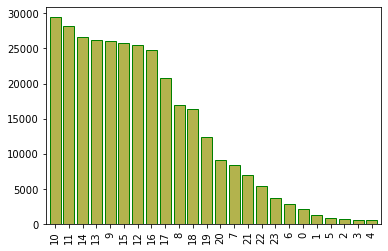

In [53]:
# Bar chart of the "df_married_adult" dataframe and "order_hour_of_day" column

bar_chart1_married_adult = df_married_adult['order_hour_of_day'].value_counts().plot.bar(color=(0.7, 0.7, 0.3),  edgecolor='green', width=0.8)

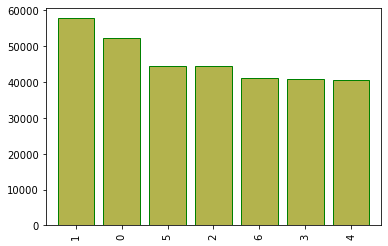

In [54]:
# Bar chart of the "df_married_adult" dataframe and "orders_day_of_the_week" column

bar_chart2_married_adult = df_married_adult['orders_day_of_the_week'].value_counts().plot.bar(color=(0.7, 0.7, 0.3), edgecolor='green', width=0.8)


In [55]:
# Subset containing the "single adult" customer profile

df_single_adult =  df_small[df_small['customer_profile'] == 'single adult']

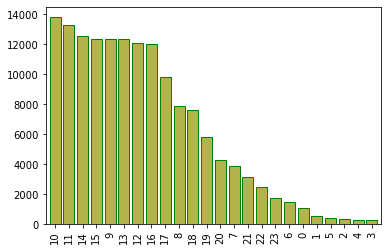

In [56]:
# Bar chart of the "df_single_adult" dataframe and "order_hour_of_day" column

bar_chart5_single_adult = df_single_adult['order_hour_of_day'].value_counts().plot.bar(color=(0.7, 0.7, 0.3),  edgecolor='green', width=0.8)

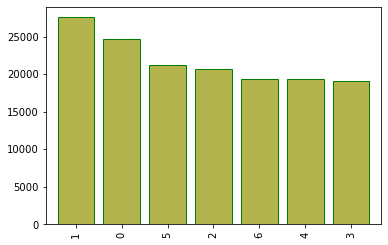

In [57]:
# Bar chart of the "df_single_adult" dataframe and "orders_day_of_the_week" column

bar_chart6_single_adult = df_single_adult['orders_day_of_the_week'].value_counts().plot.bar(color=(0.7, 0.7, 0.3), edgecolor='green', width=0.8)


In [58]:
# Subset containing the "senior" customer profile

df_senior =  df_small[df_small['customer_profile'] == 'senior']

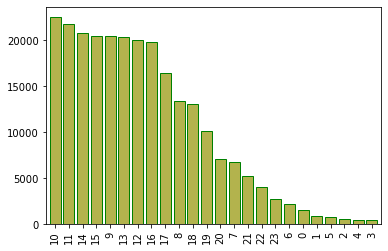

In [59]:
# Bar chart of the "df_senior" dataframe and "order_hour_of_day" column

bar_chart9_senior = df_senior['order_hour_of_day'].value_counts().plot.bar(color=(0.7, 0.7, 0.3),  edgecolor='green', width=0.8)

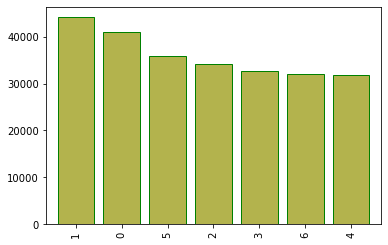

In [60]:
# Bar chart of the "df_senior" dataframe and "orders_day_of_the_week" column

bar_chart10_senior = df_senior['orders_day_of_the_week'].value_counts().plot.bar(color=(0.7, 0.7, 0.3),  edgecolor='green', width=0.8)

#### 10. Exercise Q6. Histogram: profile distribution

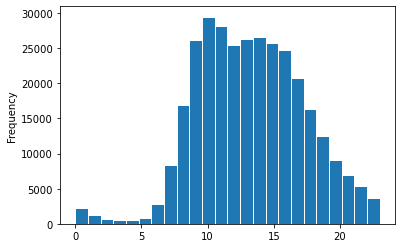

In [61]:
# Histogram of the "df_married_adult" dataframe and "order_hour_of_day" column

histogram1_married_adult = df_married_adult['order_hour_of_day'].plot.hist(bins = 24, edgecolor='white')

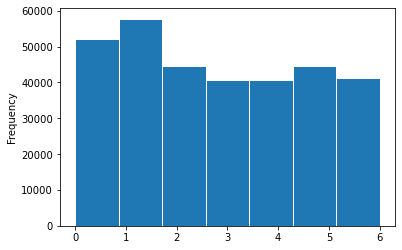

In [62]:
# Histogram of the "df_married_adult" dataframe and "orders_day_of_the_week" column

histogram2_married_adult = df_married_adult['orders_day_of_the_week'].plot.hist(bins = 7, edgecolor='white')

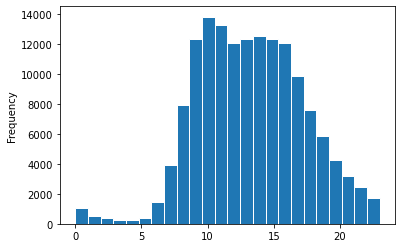

In [63]:
# Histogram of the "df_single_adult" dataframe and "order_hour_of_day" column

histogram3_single_adult = df_single_adult['order_hour_of_day'].plot.hist(bins = 24, edgecolor='white')

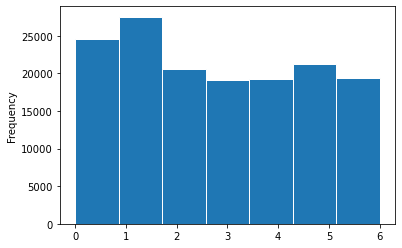

In [64]:
# Histogram of the "df_single_adult" dataframe and "orders_day_of_the_week" column

histogram4_single_adult = df_single_adult['orders_day_of_the_week'].plot.hist(bins = 7, edgecolor='white')

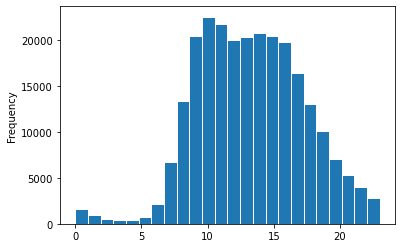

In [65]:
# Histogram of the "df_senior" dataframe and "order_hour_of_day" column

histogram5_senior = df_senior['order_hour_of_day'].plot.hist(bins = 24, edgecolor='white')

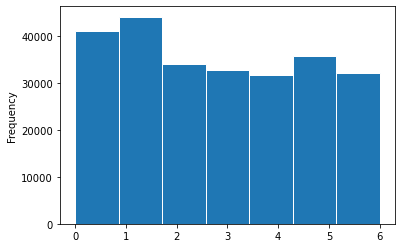

In [75]:
# Histogram of the "df_senior" dataframe and "orders_day_of_the_week" column

histogram6_senior = df_senior['orders_day_of_the_week'].plot.hist(bins = 7, edgecolor='white')

#### 11. Exercise Q7. Aggregate the max, mean, and min on a customer-profile (frequency & expenditure)

In [76]:
# Max, mean, and min on customer profiles for usage expenditure

df_small.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                      mean  min   max
customer_profile                     
married adult     7.767639  1.0  15.0
senior            7.776717  1.0  15.0
single adult      7.794932  1.0  15.0

In [77]:
# Max, mean, and min on customer profiles for usage frequency

df_small.groupby('customer_profile').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                   mean  min   max
customer_profile                                  
married adult                 10.766794  0.0  30.0
senior                        10.693335  0.0  30.0
single adult                  10.673920  0.0  30.0

#### 12. Exercise Q8. Compare customer profiles with regions and departments

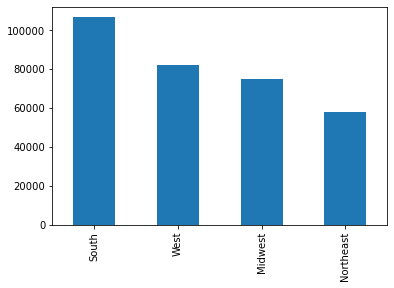

In [78]:
# Compare "married_adult" customer profile with region

bar_chart3_married_adult = df_married_adult['region'].value_counts().plot.bar()

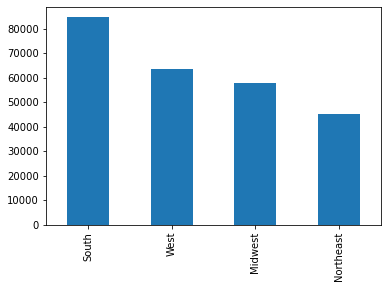

In [79]:
# Compare "senior" customer profile with region

bar_chart11_senior = df_senior['region'].value_counts().plot.bar()

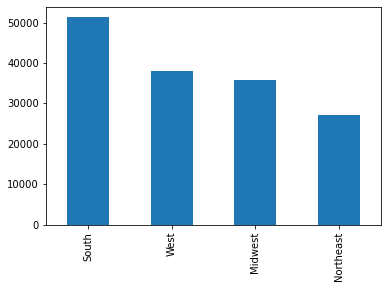

In [80]:
# Compare "single_adult" customer profile with region

bar_chart7_single_adult = df_single_adult['region'].value_counts().plot.bar()

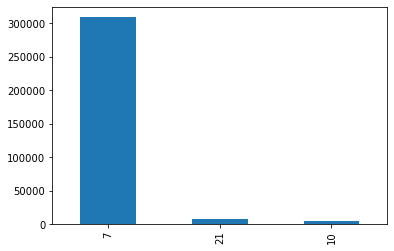

In [81]:
# Compare "married_adult" customer profile with departments

bar_chart12_married_adult = df_married_adult['department_id'].value_counts().plot.bar()

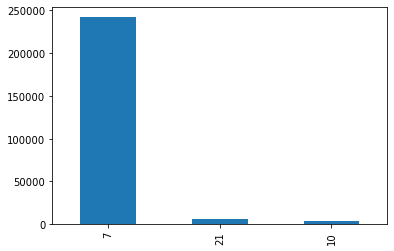

In [82]:
# Compare "senior" customer profile with departments

bar_chart4_df_senior = df_senior['department_id'].value_counts().plot.bar()

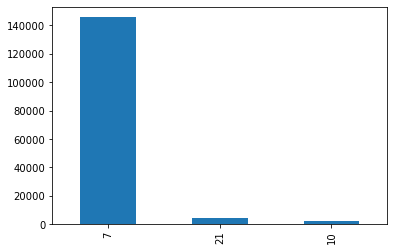

In [83]:
# Compare "single_adult" customer profile with departments

bar_chart8_single_adult = df_single_adult['department_id'].value_counts().plot.bar()

#### 13. Exercise Q9. Export visualizations in relevant project folder

In [76]:
# Export the bar chart "bar_chart1_married_adult"

bar_chart1_married_adult.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart1_married_adult.png'))

In [77]:
# Export the bar chart "bar_chart2_married_adult"

bar_chart2_married_adult.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart2_married_adult.png'))

In [78]:
# Export the histogram "histogram1_married_adult"

histogram1_married_adult.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram1_married_adult.png'))

In [79]:
# Export the histogram "histogram2_married_adult"

histogram2_married_adult.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram2_married_adult.png'))

In [80]:
# Export the bar chart "bar_chart3_married_adult"

bar_chart3_married_adult.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart3_married_adult.png'))

In [81]:
# Export the bar chart "bar_chart4_df_senior"

bar_chart4_df_senior.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart4_df_senior.png'))

In [82]:
# Export the bar chart "bar_chart5_single_adult"

bar_chart5_single_adult.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart5_single_adult.png'))

In [83]:
# Export the bar chart "bar_chart6_single_adult"

bar_chart6_single_adult.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart6_single_adult.png'))

In [84]:
# Export the histogram "histogram3_single_adult"

histogram3_single_adult.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram3_single_adult.png'))

In [85]:
# Export the histogram "histogram4_single_adult"

histogram4_single_adult.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram4_single_adult.png'))

In [86]:
# Export the bar chart "bar_chart7_single_adult"

bar_chart7_single_adult.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart7_single_adult.png'))

In [87]:
# Export the bar chart "bar_chart8_single_adult"

bar_chart8_single_adult.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart8_single_adult.png'))

In [88]:
# Export the bar chart "bar_chart9_senior"

bar_chart9_senior.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart9_senior.png'))

In [89]:
# Export the bar chart "bar_chart10_senior"

bar_chart10_senior.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart10_senior.png'))

In [90]:
# Export the histogram "histogram5_senior"

histogram5_senior.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram5_senior.png'))

In [91]:
# Export the histogram "histogram5_senior"

histogram6_senior.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram6_senior.png'))

In [92]:
# Export the bar chart "bar_chart11_senior"

bar_chart11_senior.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart11_senior.png'))

In [93]:
# Export the bar chart "bar_chart12_married_adult"

bar_chart12_married_adult.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart12_married_adult.png'))